In [ ]:
# testowanie instalacji
# po "nowemu" (tf.keras)

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(keras.__version__)


In [ ]:
import keras
print(keras.__version__)

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()


In [ ]:
# https://keras.io/examples/mnist_mlp/

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# ręczne uruchomienie predykcji 
predictions = model.predict(x_test)
print("Przewidywana cyfra to:", np.argmax(predictions[0]), "; prawdziwa cyfra:", np.argmax(y_test[0]))
      



# ZADANIE
predykcja dla jednego, losowego elementu (pojedynczego obrazu) i porównanie z ground truth


In [ ]:
import pydot

In [ ]:
# # wizualizacja modelu
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
# wizualizacja historii uczenia 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Zapisywanie i ponowne wczytywanie modelu

# pełny model
model.save('keras_MLP_full.h5')

# wczytywanie pełnego modelu
new_model = keras.models.load_model('keras_MLP_full.h5')
new_model.summary()

'''
# zapisane zostaną:

1. architektura modelu
2. wagi modelu
3. konfiguracja treningowa (loss, optimizer)
4. stan optymalizatora, pozwalający na wznowienie uczenia
'''


In [ ]:
from keras.models import model_from_json

# zapisywanie architektury modelu do pliku JSON
json_config = model.to_json()
reinitialized_model = keras.models.model_from_json(json_config)

with open("model_architecture.json", "w") as f:
    f.write(json_config)
    
# zapisywanie wag
model.save_weights('model_weights.h5')


# wczytanie architektury i wag
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')

model.summary()



# Zadanie
- nauczyć model na 5 epokach, wypisać accuracy
- zapisać model na dysk
- wczytać model a następnie dokończyć uczenie na 15 epokach

In [ ]:
# Early stopping i system checkpointów

from keras.callbacks import EarlyStopping, ModelCheckpoint


checkpoint_path = 'checkpoints/checkpoin-{epoch:02d}-{val_acc:.2f}.hdf5'

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=False, mode='min')
]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=keras_callbacks)




In [ ]:
# zapisywanie modelu do formatu produkcyjnego (ONNX)
# https://onnx.ai/
# pip install keras2onnx onnxmltools onnxruntime



import keras2onnx
import onnxruntime
import onnxmltools

model_path = 'keras_MLP_full.h5'
new_model = keras.models.load_model(model_path)


# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, model.name)


onnxmltools.utils.save_model(onnx_model, 'keras_example.onnx')




# ZADANIE - MNIST Fashion
Na podstawie bazy danych MNIST Fashion opracować sieć, która będzie przewidywała rodzaj ubrania 

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras 

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Zmiana typu danych na float
train_images = train_images / 255.0
test_images = test_images / 255.0



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)


train_images_tensor = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_tensor = test_images.reshape((test_images.shape[0], 28, 28, 1))




In [ ]:
model = tf.keras.Sequential()


# https://ezyang.github.io/convolution-visualizer/index.html



model.add(Conv2D(64, (8,8), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))




model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])




# metrics - https://keras.io/metrics/
# accuracy
# binary_accuracy
# categorical_accuracy
# top_k_categorical_accuracy
# custom



# loss=
# categorical_crossentropy - one-hot encodings
# sparse_categorical_crossentropy - labels (integers)
# binary_crossentropy

# optimizers
# https://keras.io/optimizers/
# https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
# adam
# SGD
# RMSprop
# Adagrad




In [ ]:
model.fit(train_images_tensor,
         train_labels_categorical,
         batch_size=64,
         epochs=5)


# Evaluate the model on test set
score = model.evaluate(train_images_tensor, train_labels_categorical, verbose=0)# Print test accuracy
print('\n', 'Test accuracy:', score[1])


results = model.predict(train_images_tensor)

# Polepszanie jakości danych z wykorzystaniem generatorów

Poważnym problemem większości algorytmów uczenia maszynowego, zwłaszcza z wykorzystaniem sieci głębokich, jest brak wystarczającej ilości danych uczących. W wielu jednak przypadkach możliwe jest sztuczne zwiększenie ilości poprzez zastosowanie tzw. generatorów. 
Działanie generatora polega na modyfikacji istniejącego zestawu danych poprzez dodanie losowych transformacji: przesunięć, obrotów (flip), rotacji, pochyleń (skew), zoom lub ucięcia (crop)



In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20
save_dir = 'saved_models'
model_name = 'keras_cifar10_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flatten - https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras
# https://missinglink.ai/guides/keras/using-keras-flatten-operation-cnn-models-code-examples/

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


# Zadanie: 
Przygotowanie własnego datasetu (cats vs dogs) i na jego podstawie przygotowanie sieci konwolucyjnej umożliwiającej rozróżnienie pomiędzy klasami.
Rozwiązanie musi zawierać:
    1. Zapisywanie checkpointów
    2. Data augmentation
    3. Early Stopping



1. Co jeśli nie bedzie flatten ?
2. Zoptymalizować fashinmista, znalezc optymalne parametry jakie filtry jaki rozmiari jak wpływa
3. na własnym data secie, zobaczyli jak ciezko przygotowac jest zbior danych, zrobic rozpoznawanie cats vs dogs
architektura sieci(rozbudowa, liczba filtrow,wieloksc filtra) zapisujemy w katalogu, funkcja loadowania data setu
i wykorzystuje data augmentation, wmozna zrobic early stoppoing
nie robimy architektur w stylu pomijanie warstw, rekurencja itd. 

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir())

Using TensorFlow backend.


['.ipynb_checkpoints', 'CNN-laboratorium_1.ipynb', 'El Projekto.ipynb', 'PetImages', 'PetImagesTest', 'RPS', 'RPS TEST']


In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = os.listdir(r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImages\Pets")
categories = []

for filename in filenames:
    category = filename.split(' ')[0]
    
    if category == 'Cat':
        categories.append(1)
    elif category == 'Dog':
        categories.append(0)
    else:
        categories.append(3)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head()

,filename,category
0,Cat (10000).jpg,1
1,Cat (10001).jpg,1
2,Cat (10002).jpg,1
3,Cat (10003).jpg,1
4,Cat (10004).jpg,1


In [6]:
df.tail()

,filename,category
18907,Dog (9995).jpg,0
18908,Dog (9996).jpg,0
18909,Dog (9997).jpg,0
18910,Dog (9998).jpg,0
18911,Dog (9999).jpg,0


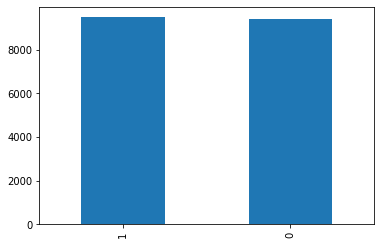

In [7]:
df['category'].value_counts().plot.bar()

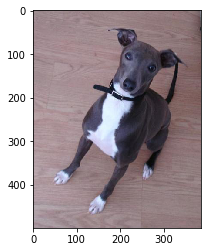

In [8]:
sample = random.choice(filenames)
image = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImages\Pets\\"+sample)
plt.imshow(image)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)  
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2,  verbose=1, factor=0.5, min_lr=0.00001)

In [11]:
callbacks = [earlystop, learning_rate_reduction]

In [12]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) # BŁĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄĄD

In [13]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

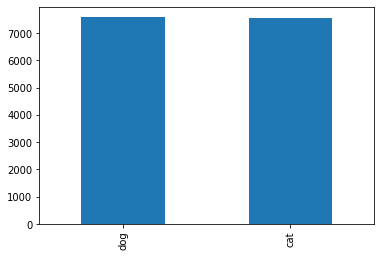

In [14]:
train_df['category'].value_counts().plot.bar()

In [15]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImages\Pets", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 15129 validated image filenames belonging to 2 classes.


In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImages\Pets", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3783 validated image filenames belonging to 2 classes.


In [18]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImages\Pets", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 7
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [ ]:
test_filenames = os.listdir(r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImagesTest")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImagesTest", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 'cat', 'cat': 'dog' })   #bo wyżej odwrotnie napisane ^^

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(27)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImagesTest\\" +filename, target_size=IMAGE_SIZE)
    plt.subplot(9, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
sample_test = test_df.head(9)
sample_test.sample()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN-2\PetImagesTest\\" +sample, target_size=IMAGE_SIZE)
    plt.subplot(9, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()